#California Real Estate Prediction

In [325]:
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns 
import numpy as np

##Exploring the data with Pandas

In [326]:
#tabular overview over the dataset
df = pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [329]:
#shape of the dataset
print(f'(rows, columns): {df.shape}')

(rows, columns): (20640, 10)


##Manipulating the data for consistency and a better analysis

In [ ]:
#Rescaling the median_income values from original scale (in 10,000 dollars) to a normalized scale (in 1 dollar)
df['median_income'] = df['median_income'] * 10000

In [279]:
#Exploring empty values 
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [280]:
#Filling Null values with average (expected) values
average_bedrooms_per_room = (df['total_bedrooms'] / df['total_rooms']).mean()
df['total_bedrooms'] = df['total_bedrooms'].fillna(np.floor(df['total_rooms'] * average_bedrooms_per_room))

In [277]:
#viewing the ocean_proximity values
df['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [281]:
#replacing ocean_proximity column with numeric (binary) values
dummies= pd.get_dummies(df.ocean_proximity).astype(int)
df.drop('ocean_proximity',inplace=True,axis=1)
df.join(dummies)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,83252.0,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,83014.0,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,72574.0,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,56431.0,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,38462.0,342200.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,15603.0,78100.0,0,1,0,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,25568.0,77100.0,0,1,0,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,17000.0,92300.0,0,1,0,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,18672.0,84700.0,0,1,0,0,0


In [283]:
# CALCULATING DATA STATS
min_price = np.min(df['median_house_value'])
max_price = np.max(df['median_house_value'])
average_price = np.round(np.mean(df['median_house_value']),decimals=2)
average_households = np.mean(df['households'])
average_income = np.round(np.mean(df['median_income']),decimals=2)

print(f'minimum price: {min_price}$')
print(f'maximum price: {max_price}$')
print(f'average price: {average_price}$')
print(f'average income: {average_income}$')
print(f'average households per block: {np.ceil(average_households)}')

minimum price: 14999.0$
maximum price: 500001.0$
average price: 206855.82$
average income: 38706.71$
average households per block: 500.0


In [284]:
# SPLITTING THE DATA
from sklearn.model_selection import train_test_split
x = df.drop(['median_house_value'], axis=1)
y = df['median_house_value']
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

#concat data for visualization
tdf = pd.concat([xtrain,ytrain],axis=1)

<AxesSubplot:>

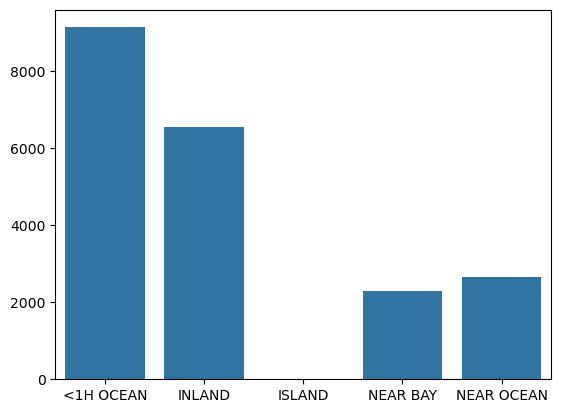

In [285]:
bar_data = dummies.sum()
sns.barplot(bar_data)

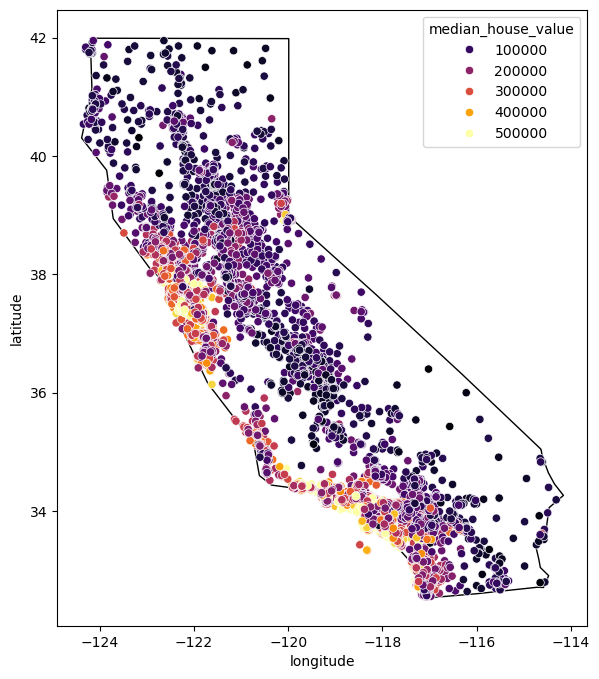

In [286]:
import geopandas as gpd

# Laden der Geodaten für Kalifornien von Natural Earth
california = gpd.read_file('ne_110m_admin_1_states_provinces_lakes')
california = california[california['name'] == 'California']

# Anzeigen der Kalifornien-Karte
plt.figure(figsize=(15,8))
california.plot(ax=plt.gca(), color='white', edgecolor='black', zorder=0)
sns.scatterplot(x='longitude' , y='latitude', data = tdf, hue='median_house_value', zorder=1, ax=plt.gca(),palette='inferno')
#plt.imshow(background_image,extent=[20,35,-120,-104], zorder= 0)
plt.show()


<AxesSubplot:>

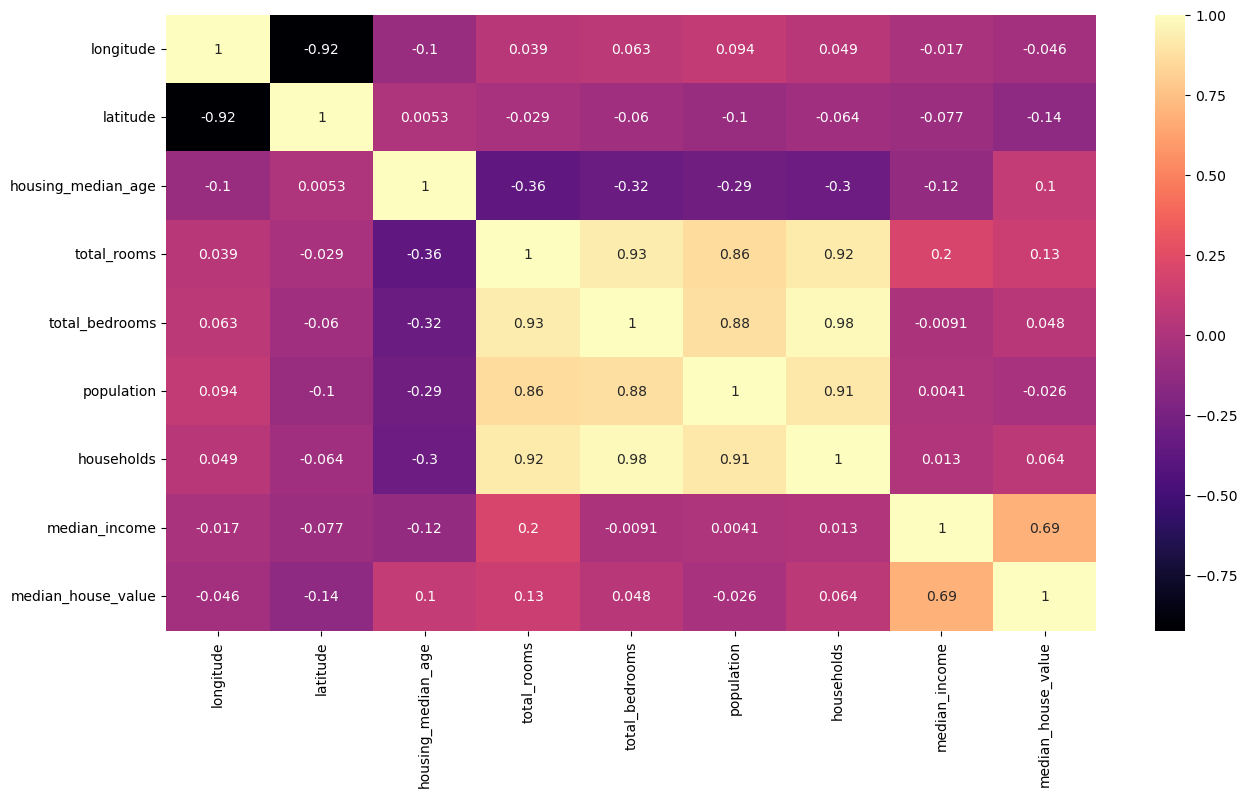

In [287]:
#correlations 
plt.figure(figsize=(15,8))
sns.heatmap(tdf.corr(), annot=True, cmap='magma')

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

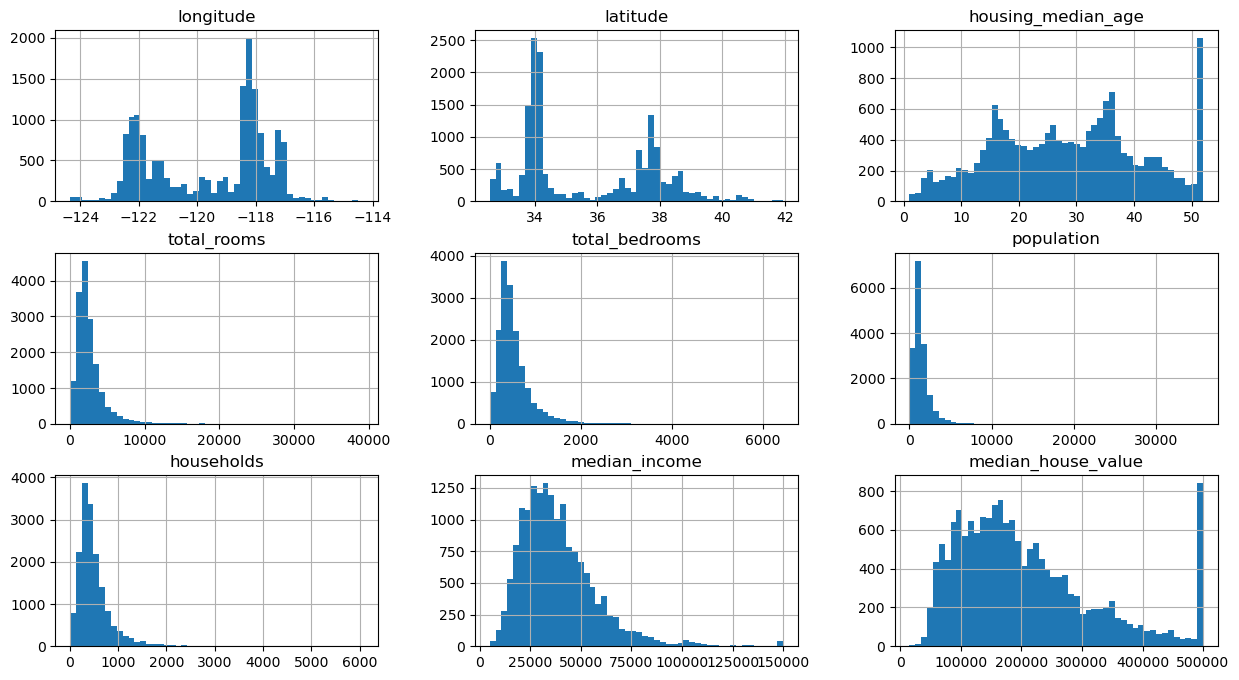

In [289]:
tdf.hist(bins=50, figsize=(15, 8))

In [312]:
#linear regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(xtrain,ytrain)

LinearRegression()

In [314]:
ypred = lr.predict(xtest)
ypred

array([ 50366.67665472, 176550.27870716, 297252.042808  , ...,
       439178.19697467, 130408.85287057, 175272.25192553])

In [319]:
from sklearn.metrics import mean_squared_error
pred = lr.predict(xtest)
lin_mse = mean_squared_error(ytest,pred)
lin_rmse = np.sqrt(lin_mse)
print('rmse : ',lin_rmse)

rmse :  70319.85864534146


In [318]:
lin_reg_score = lr.score(xtest,ytest)
print('R² : ',lin_reg_score )

R² :  0.6226458607953953
